# WayNet - Road Segmentation Task Project

### Dependencies

In [7]:
!pip install albumentations

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 1.5 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import tensorflow as tf
import albumentations as alb

### Loading the Data

In [2]:
df= load_dataset("bnsapa/road-detection")
df_train = df["train"]
df_train

Dataset({
    features: ['image', 'segment', 'lane'],
    num_rows: 160
})

### Preprocessing

In [34]:
images = []
masks = []
n = 0
aug_x = 4

In [35]:
transpose = alb.Compose([
    alb.HorizontalFlip(p = 0.5),
    alb.VerticalFlip(p = 0.5),
    alb.Resize(256,256),
    alb.RandomBrightnessContrast(p=0.2)    
])
transpose

Compose([
  HorizontalFlip(p=0.5),
  VerticalFlip(p=0.5),
  Resize(p=1.0, height=256, width=256, interpolation=1, mask_interpolation=0),
  RandomBrightnessContrast(p=0.2, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True, ensure_safe_range=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={}, is_check_shapes=True)

In [36]:
for i in df_train:
    n+=1
    img = np.array(i["image"])
    mask = np.array(i["segment"])
    if mask.shape == 2:
        mask = np.expand_dims(mask,axis = -1)
    images.append(img)
    masks.append(mask)
    
    for _ in range(aug_x):
        augmented = transpose(image = img,mask = mask)
        aug_img,aug_mask = augmented["image"],augmented["mask"]
        if aug_mask.shape == 2:
            aug_mask = np.expand_dims(aug_mask,axis = -1) 
        images.append(aug_img)
        masks.append(aug_mask)

    print(f"[IMAGE: {n}]=============================[DONE]")

[IMAGE: 1]=============================[DONE]
[IMAGE: 2]=============================[DONE]
[IMAGE: 3]=============================[DONE]
[IMAGE: 4]=============================[DONE]
[IMAGE: 5]=============================[DONE]
[IMAGE: 6]=============================[DONE]
[IMAGE: 7]=============================[DONE]
[IMAGE: 8]=============================[DONE]
[IMAGE: 9]=============================[DONE]
[IMAGE: 10]=============================[DONE]
[IMAGE: 11]=============================[DONE]
[IMAGE: 12]=============================[DONE]
[IMAGE: 13]=============================[DONE]
[IMAGE: 14]=============================[DONE]
[IMAGE: 15]=============================[DONE]
[IMAGE: 16]=============================[DONE]
[IMAGE: 17]=============================[DONE]
[IMAGE: 18]=============================[DONE]
[IMAGE: 19]=============================[DONE]
[IMAGE: 20]=============================[DONE]
[IMAGE: 21]=============================[DONE]
[IMAGE: 22]===========

In [37]:
images = np.stack(images).astype(np.float32) / 255.0
masks = np.stack(masks).astype(np.float32)

print(f"Images Shape: {images.shape}")
print(f"Masks Shape: {masks.shape}")

ValueError: all input arrays must have the same shape

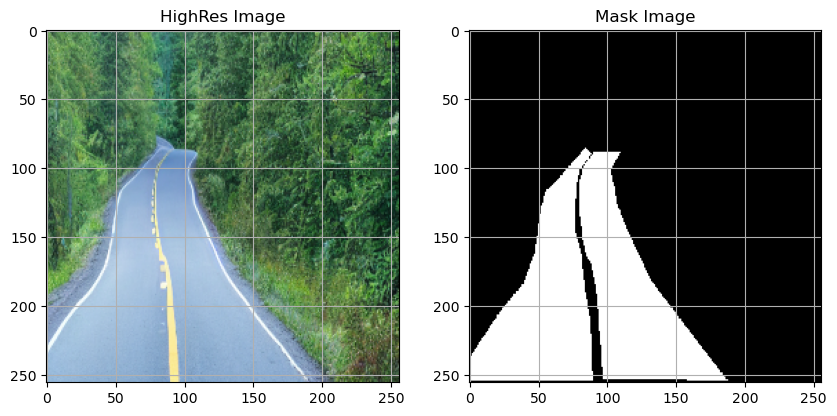

In [22]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(images[150])
plt.title("HighRes Image")
plt.grid(True)
plt.subplot(1,2,2)
plt.imshow(masks[150],cmap="gray")
plt.grid(True)
plt.title("Mask Image")
plt.show()